<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/COMPLETE_Spotify_clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 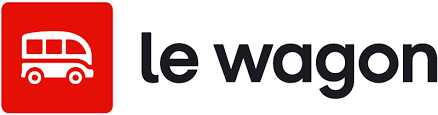

# Spotify clustering

In this challenge, we'll be using a dataset from Spotify that contains metadata for songs on the platform.

By metadata we mean info about the song such as name, artists, metrics about it's sound and other musical attributes.

We will use this dataset to try and cluster songs together that are closely related! This is the underlying theory behind how recommender algorithms work on sites such as Spotify, Netflix, etc.

## Data Exploration

Please run the cell below to return the spotify song data!

In [1]:
import pandas as pd

spotify_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv')
spotify_df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


For the purposes of our analyses, we will only need the numeric features from our dataset. Select only these and save them in a variable called `spotify_numeric`

In [2]:
# Select only the numeric features from the Spotify dataset #
spotify_numeric = spotify_df[['popularity', 'danceability', 'valence', 'energy', 'explicit', 'key', 'liveness', 'loudness', 'speechiness', 'tempo']]

# Display the first few rows of the new DataFrame #
print(spotify_numeric.head())


   popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  
0   -12.696       0.0334  117.674  
1   -10.692       0.0280  143.783  
2    -9.803       0.0378   84.341  
3    -6.955       0.0610  174.005  
4   -13.095       0.0679   78.716  


Have a read through your features and try to understand what they are related to!

Spotify generate their own features that relate to abstract characteristcs that can be attributed to a piece of music (e.g. 'valence' or 'danceability'), you don't need to worry about how these are calculated!

Then we also have some information that is more literal such as the 'key', 'tempo' and whether a song is 'explicit' or not.

Investiate the distributions of some of your variables below:

- What is the ratio of explicit vs non-explicit songs?
- How is popularity distributed?
- How are Spotify's internal song metrics distributed?

What is the ratio of explicit vs non-explicit songs?

In [5]:
# Calculate the ratio of non-explicit songs #
ratio_non_explicit = 1 - ratio_explicit

# Print the ratios #
print("Ratio of explicit songs:", ratio_explicit)
print("Ratio of non-explicit songs:", ratio_non_explicit)



Ratio of explicit songs: 0.1032
Ratio of non-explicit songs: 0.8968


This tells us that in the Spotify dataset:

    Approximately 10.32% of the songs are marked as explicit.
    Approximately 89.68% of the songs are marked as non-explicit.

How is popularity distributed?

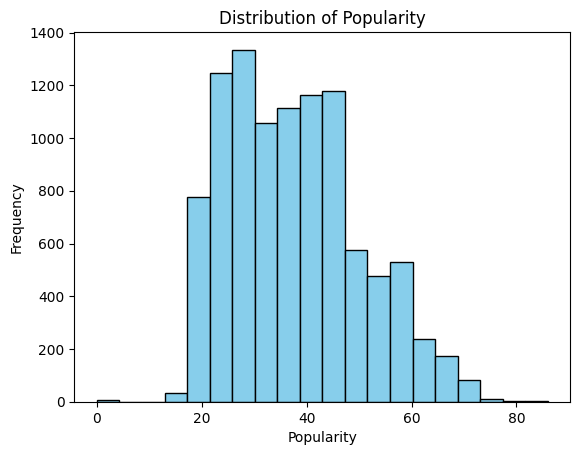

In [7]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'popularity' column #
plt.hist(spotify_df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()


How are Spotify's internal song metrics distributed?

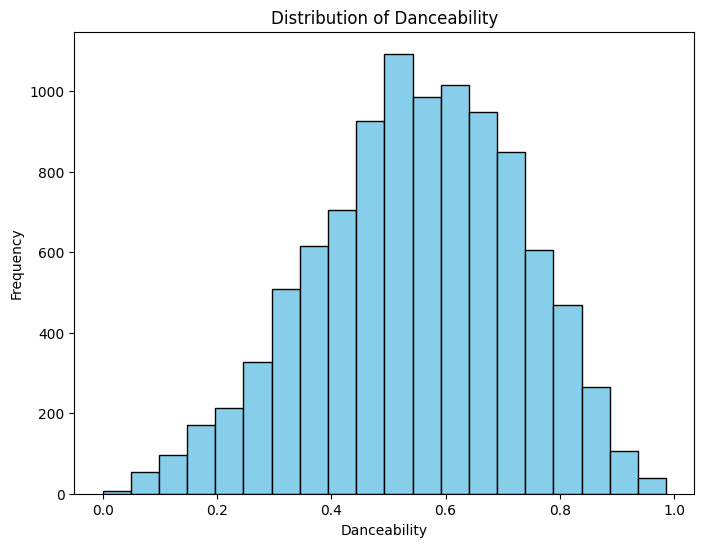

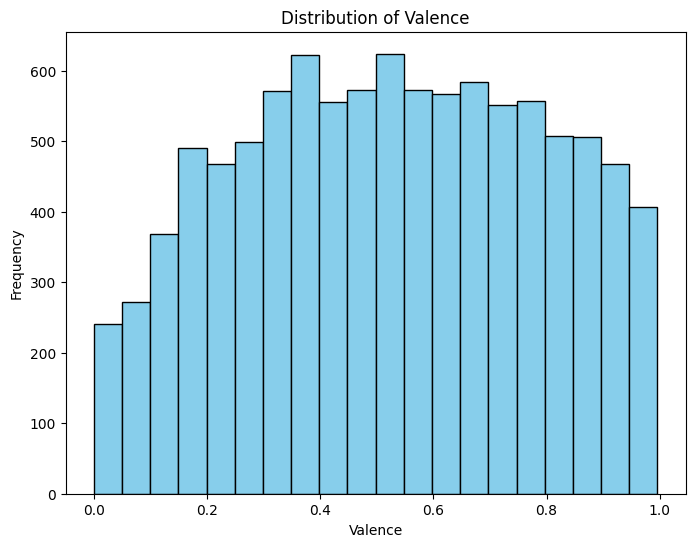

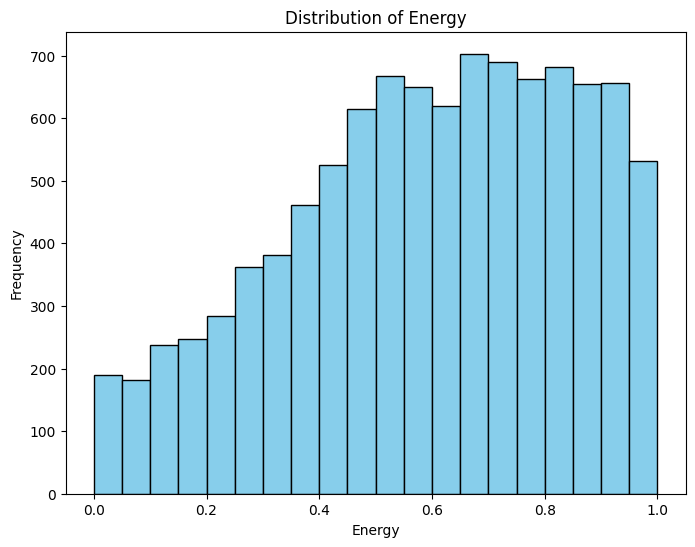

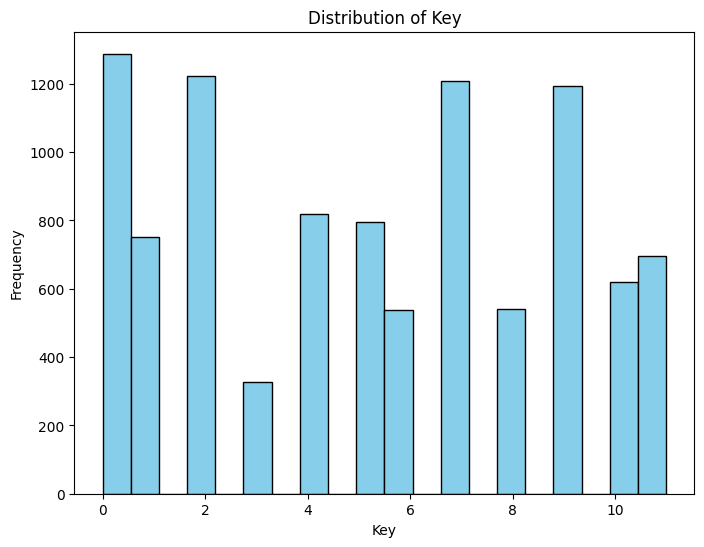

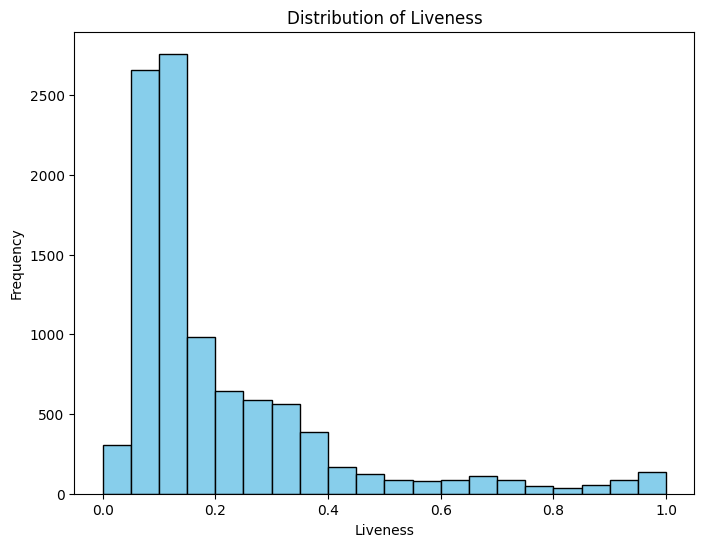

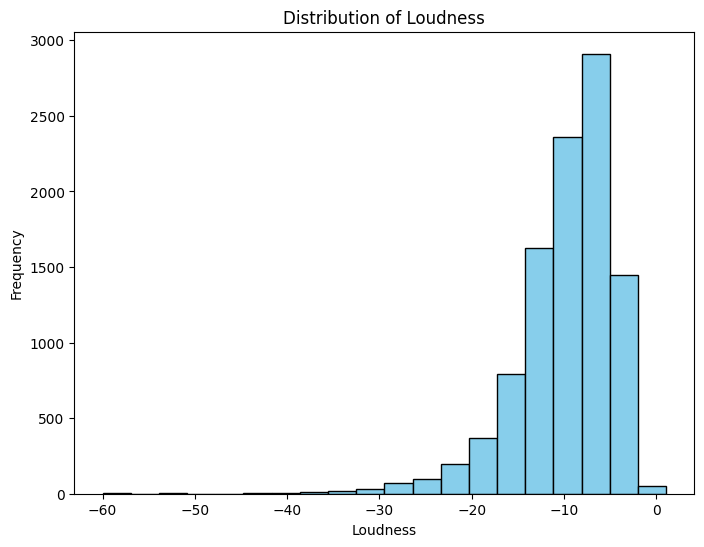

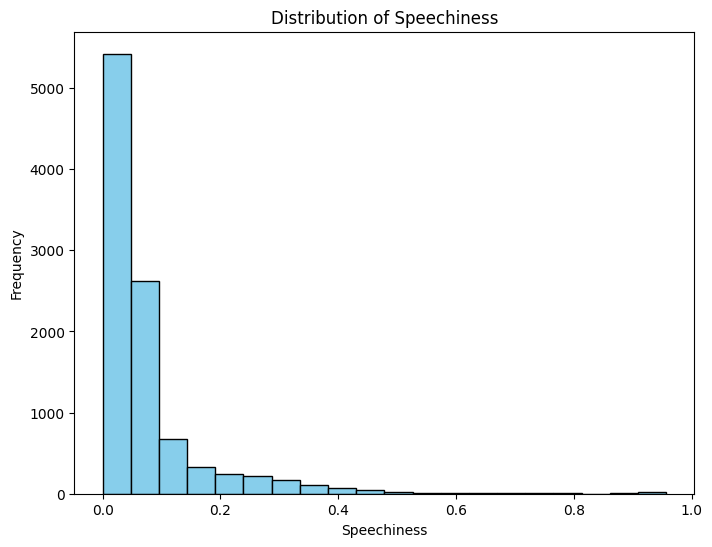

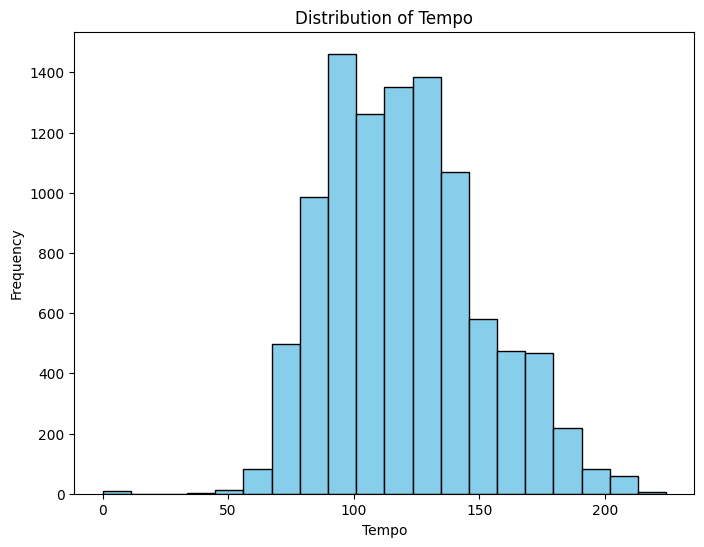

In [10]:
import matplotlib.pyplot as plt

# Define the list of metrics to plot #
metrics = ['danceability', 'valence', 'energy', 'key', 'liveness', 'loudness', 'speechiness', 'tempo']

# Plot histograms for each metric #
for metric in metrics:
    plt.figure(figsize=(8, 6))  # Set figure size #
    plt.hist(spotify_df[metric], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(metric.capitalize())  # Capitalize metric name for xlabel #
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + metric.capitalize())  # Capitalize metric name for title #
    plt.show()


The cell below will visualize three of your features in 3D space. Feel free to switch up the variables that are being used for the *x*, *y*, *z* axes.

Because we are using plotly express, you can use your cursor to move around / zoom in & out of the chart.

In [11]:
import plotly.express as px

fig = px.scatter_3d(spotify_numeric,
                    x='danceability',
                    y='energy',
                    z='speechiness',
                    opacity=0.7,
                    width=500,
                    height=500
           )
fig.show()

## First model

Our goal in this challenge is to cluster our songs into similar groups! The plot above may or may not reveal things that look like clusters, but remember! We can only visualise three of our variables here at a time.

When we train a clustering model it will cluster our songs in n-dimensional space, where n is the number of features being fed into the model.

Let's start by instantiating a simple KMeans model, with 8 clusters.

Fit this to your numeric spotify data and save the labels that your model has stored in a variable called `labels_simple`.

<details>
    <summary><i>Hint</i></summary>

To get the labels, have a look at the attributes your model has once it has been fitted to your data.
</details>

In [15]:
from sklearn.cluster import KMeans

# Instantiate KMeans model with 8 clusters and set n_init explicitly #
kmeans_simple = KMeans(n_clusters=8, n_init=10, random_state=42)

# Fit the model to the numeric Spotify data #
kmeans_simple.fit(spotify_numeric)

# Get the labels assigned to each sample #
labels_simple = kmeans_simple.labels_


What is the distribution of our labels? How many songs do we have in each cluster?

In [19]:
import pandas as pd

# Convert labels_simple to a pandas Series #
labels_series = pd.Series(labels_simple)

# Calculate the distribution of labels #
label_distribution = labels_series.value_counts()

# Print the distribution #
print(label_distribution)


0    1784
7    1552
5    1419
2    1198
3    1119
6    1116
4    1030
1     782
Name: count, dtype: int64


We can also now visualise our songs in 3D space again, but this time colour them by our new labels to see what clusters we have created! Run the cell below to see how it's looking.

In [20]:
fig = px.scatter_3d(spotify_numeric,
                    x='danceability',
                    y='energy',
                    z='speechiness',
                    color=labels_simple,
                    width=500,
                    height=500)
fig.show()

It looks a little bit chaotic doesn't it... I'm not sure I'd be forking out the monthly suscription costs if my discover weekly was as all the place as this chart is.

Do you have any intuitions as to why our labels might look so poorly clustered?

<details>
    <summary><i>Answer</i></summary>

Remember that KMeans (and most unsupervised learning algorithms) are distance based. We have **not** scaled our numeric features yet. Perhaps doing this will make things look a bit clearer?
</details>

In the cell below, perform the preprocessing on our dataset that you deem necessary!

## Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler #
scaler = StandardScaler()

# Fit scaler to the numeric features and transform the data #
spotify_numeric_scaled = scaler.fit_transform(spotify_numeric)

# Convert the scaled data back to a DataFrame #
spotify_numeric_scaled_df = pd.DataFrame(spotify_numeric_scaled, columns=spotify_numeric.columns)

# Display the first few rows of the scaled DataFrame #
print(spotify_numeric_scaled_df.head())


   popularity  danceability   valence    energy  explicit       key  liveness  \
0   -1.238686      0.721511  0.137131 -0.637854 -0.339228 -0.619225 -0.707788   
1   -0.999816     -0.525061 -1.010349 -0.892028 -0.339228  0.223029 -0.277705   
2   -1.318309     -0.654211  1.185161  0.521816 -0.339228 -1.461479 -0.205422   
3   -1.238686     -0.637365  1.326684  1.276395 -0.339228 -0.057722  3.331277   
4   -1.159063      0.670974  0.156255 -0.717283 -0.339228  0.503780  0.987246   

   loudness  speechiness     tempo  
0 -0.540084    -0.478030 -0.082809  
1 -0.163448    -0.531779  0.780035  
2  0.003632    -0.434235 -1.184390  
3  0.538890    -0.203313  1.778805  
4 -0.615072    -0.134634 -1.370283  


## Modelling with preprocessed data

Now, let's train and fit a model in the same way that we did above. However, this time we will use the scaled data! Save the labels in a variable called `labels_scaled`

In [24]:
# Instantiate KMeans model with 8 clusters #
kmeans_scaled = KMeans(n_clusters=8, random_state=42)

# Fit the model to the scaled numeric Spotify data #
kmeans_scaled.fit(spotify_numeric_scaled)

# Get the labels assigned to each sample #
labels_scaled = kmeans_scaled.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Run the cell below to see how our clusters look in 3D space, but with our newly scaled data.

In [27]:
import pandas as pd
import plotly.express as px

# Convert the scaled data back to a DataFrame and reassign column names #
spotify_numeric_scaled_df = pd.DataFrame(spotify_numeric_scaled, columns=spotify_numeric.columns)

# Create the 3D scatter plot with the scaled data and labels #
fig_scaled = px.scatter_3d(spotify_numeric_scaled_df,
                           x='danceability',
                           y='energy',
                           z='speechiness',
                           color=labels_scaled,
                           width=500,
                           height=500)
fig_scaled.show()


## Finding the right value for *K*

It should look a bit more tidy, maybe a bit more stratified! Progress!

**However, it still doesn't look perfect**. Remember though, we are only looking at 3 dimensions out of the 10 dimensions that our model is trained on.

It might be that, if we could visualise 10 dimensionsal space, we would see some much more intuitively shaped clusters!

So far we have been using 8 clusters for our models so far, but we havented tested whether this makes sense.

Let's use *the elbow method* to check how many of clusters we should ideally be using for this dataset. Do this below. Remember to use a plot to visualise your results.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

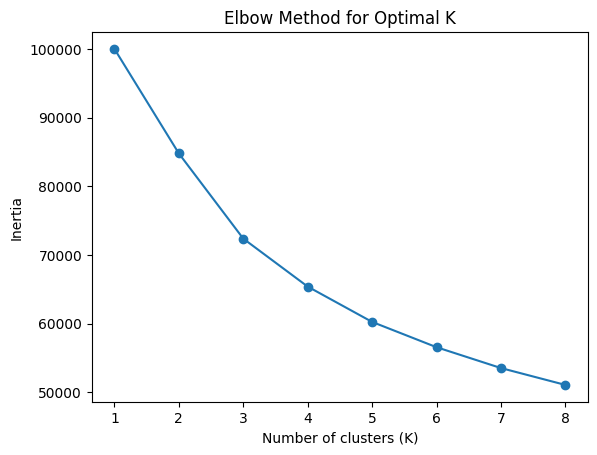

In [31]:
import matplotlib.pyplot as plt

# Calculate inertia for different values of K #
inertia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_numeric_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve #
plt.plot(range(1, 9), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

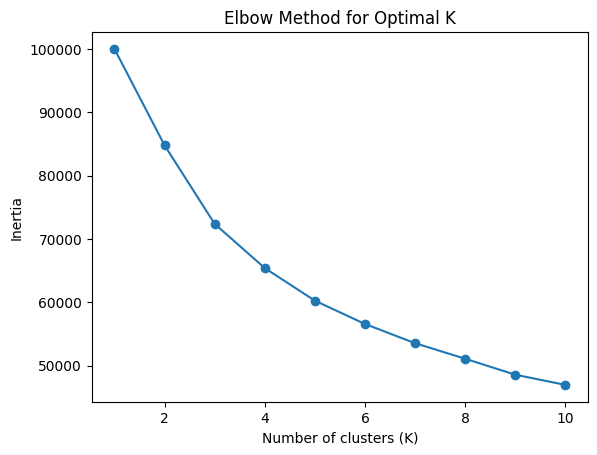

In [33]:
import matplotlib.pyplot as plt

# Calculate inertia for different values of K #
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_numeric_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve #
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [34]:
import pandas as pd

# Create a DataFrame to store the inertia values and number of clusters #
inertia_df = pd.DataFrame({'Number of clusters (K)': range(1, 11),
                           'Inertia': inertia})

# Display the DataFrame #
print(inertia_df)


   Number of clusters (K)        Inertia
0                       1  100000.000000
1                       2   84786.201165
2                       3   72389.459855
3                       4   65411.278901
4                       5   60270.206707
5                       6   56590.455093
6                       7   53557.099473
7                       8   51101.635838
8                       9   48585.031707
9                      10   46969.468674


## Creating a model with the ideal number of clusters

It looks as though have around 6 clusters makes sense with our dataset. Create a new KMeans model using 6 clusters and plot it in 3D space using the same process that we have done above. In my dataset this looks like 3 or 4. But am happy to try on 6 and work from there.

In [35]:
# Instantiate KMeans model with 6 clusters #
kmeans_6_clusters = KMeans(n_clusters=6, random_state=42)

# Fit the model to the scaled numeric Spotify data #
kmeans_6_clusters.fit(spotify_numeric_scaled)

# Get the labels assigned to each sample #
labels_6_clusters = kmeans_6_clusters.labels_

# Create the 3D scatter plot with the scaled data and labels #
fig_6_clusters = px.scatter_3d(spotify_numeric_scaled_df,
                               x='danceability',
                               y='energy',
                               z='speechiness',
                               color=labels_6_clusters,
                               width=500,
                               height=500)
fig_6_clusters.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The chart doesn't reveal a whole lot more, but perhaps we can create some theoretical playlists based on our clusters?

Add the new labels from our model that has 6 clusters to our original spotify dataframe as a column called 'label'.

In [60]:
# Add the new cluster labels to the original Spotify DataFrame #
spotify_df['label'] = labels_6_clusters

# Display the updated DataFrame with the new 'label' column #
print(spotify_df.head())


TypeError: 'str' object is not callable

## Generating Spotify playlists based on our clusters!

We should now see the original meta-data for our spotify songs, but **with the added label of which cluster they are located in** based on our KMeans algorithm

Let's generate 6 playlists (one for each cluster) that contains 15 random songs from that cluster.

Below we have created a dictionary called `daily_mixes`. Inside this dictionary we want to store keys that are the name of the cluster labels, and then as values we want dataframes that only contains the songs from that specific cluster.

Finish the for loop below to obtain this dictionary!

In [39]:
# Initialize the dictionary to store playlists for each cluster #
daily_mixes = {}

# Group the Spotify songs by their cluster labels and iterate over each group #
for cluster, group in spotify_df.groupby('label'):
    # Extract a random sample of 15 songs from the current cluster
    playlist = group.sample(n=15, random_state=42)

    # Store the playlist in the dictionary with the cluster label as the key #
    daily_mixes[f'Cluster {cluster}'] = playlist

# Print the first few rows of each playlist to verify #
for cluster, playlist in daily_mixes.items():
    print(f"Playlist for {cluster}:")
    print(playlist.head())
    print()


Playlist for Cluster 0:
                                                   name  \
3424  Whole Lotta Rosie - Live At The Marquee Club, ...   
8633                                             Horsey   
2128  Fantasia Suite - Live at Warfield Theatre, San...   
2934                                     The Zoo - Live   
2704                               Get All You Can Take   

                                                artists  popularity  \
3424                                  ["Guns N' Roses"]          34   
8633                                  ['Macross 82-99']          50   
2128  ['Al Di Meola', 'John McLaughlin', 'Paco de Lu...          32   
2934                                      ['Scorpions']          28   
2704                                           ['KISS']          29   

      danceability  valence  energy  explicit  key  liveness  loudness  \
3424         0.131    0.137   0.977         0    1     0.945    -8.851   
8633         0.484    0.388   0.829         0 

Run the cell below to print out our 6 playlists!!!

In [40]:
for key,value in daily_mixes.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['name', 'artists']])

--------------------------------------------------
Here are some songs for playlist Cluster 0
--------------------------------------------------


,name,artists
4939,Bed for the Scraping,['Fugazi']
2668,Under The Gun,['KISS']
1614,"Clock Strikes Ten - Live at Nippon Budokan, To...",['Cheap Trick']
8633,Horsey,['Macross 82-99']
3424,"Whole Lotta Rosie - Live At The Marquee Club, ...","[""Guns N' Roses""]"


--------------------------------------------------
Here are some songs for playlist Cluster 1
--------------------------------------------------


,name,artists
9216,The Way You Used to Do,['Queens of the Stone Age']
8487,How Do I Live,['Trisha Yearwood']
4464,La apariencia no es sincera - 1012 - Remaster,['Heroes Del Silencio']
7252,Súbele a la Greibol,['Cartel De Santa']
6647,What A Wonderful World (feat. Stevie Wonder),"['Rod Stewart', 'Stevie Wonder']"


--------------------------------------------------
Here are some songs for playlist Cluster 2
--------------------------------------------------


,name,artists
7624,Heaven Song,['Phil Wickham']
9946,Trying My Best,['Anson Seabra']
1660,Marooned - 2006 Remastered Version,['Wire']
292,Why Did I Choose You?,['Bill Evans']
1762,Sketch for Winter,['The Durutti Column']


--------------------------------------------------
Here are some songs for playlist Cluster 3
--------------------------------------------------


,name,artists
2023,Nobody's Hero,['Stiff Little Fingers']
2162,Rejoice - Remastered 2008,['U2']
1365,Over And Over - roule s'enroule,['Nana Mouskouri']
4247,Toca para mí - Demo,['Alejandro Sanz']
6877,So Here We Are,['Bloc Party']


--------------------------------------------------
Here are some songs for playlist Cluster 4
--------------------------------------------------


,name,artists
3565,Up And Around The Bend,"['Béla Fleck', 'Sam Bush', 'Jerry Douglas', 'S..."
8193,Home For The Holidays (feat. Jack Jezzro),['Jack Jezzro']
914,Blind Feeling,['Gary Wright']
3939,Sure Gonna Miss Her - Remastered,['Gary Lewis & The Playboys']
3017,Coming Out Of The Dark,['Gloria Estefan']


--------------------------------------------------
Here are some songs for playlist Cluster 5
--------------------------------------------------


,name,artists
8366,M.I.A.,"['Omarion', 'Wale']"
7843,143,"['Bobby Brackins', 'Ray J']"
4059,Quik Is The Name,['DJ Quik']
8730,Hard to Do,['K. Michelle']
9062,Bake Sale (feat. Travis Scott),"['Wiz Khalifa', 'Travis Scott']"


### Running clustering with DBSCAN

As a bonus, let's try and run a clustering analysis using [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)!

Remember, with `DBSCAN` we don't need to *a-prior* select the number of clusters we will end up with.

Instantiate and fit a `DBSCAN` model. Read the documentation and be sure to trial out different values for `epsilon` and `min_samples` - **this is essential to return reasonable results!** [This article](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) has some helpful tips on how to help pick reasonable values

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of values for epsilon and min_samples to try #
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

# Initialize variables to store the best parameters and corresponding silhouette score #
best_eps = None
best_min_samples = None
best_silhouette_score = -1  # Initialize with a low value

# Loop over different combinations of epsilon and min_samples #
for eps in eps_values:
    for min_samples in min_samples_values:
        # Instantiate DBSCAN model with current parameters #
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit the model to the scaled numeric Spotify data #
        dbscan.fit(spotify_numeric_scaled)

        # Check if DBSCAN identified multiple clusters #
        n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

        if n_clusters > 1:
            # Evaluate clustering performance using silhouette score #
            silhouette_avg = silhouette_score(spotify_numeric_scaled, dbscan.labels_)

            # Print the silhouette score for the current parameters #
            print(f"Parameters: epsilon={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_avg}")

            # Update best parameters if silhouette score is higher #
            if silhouette_avg > best_silhouette_score:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette_score = silhouette_avg
        else:
            print(f"No meaningful clusters found for parameters: epsilon={eps}, min_samples={min_samples}")

# Print the best parameters and corresponding silhouette score #
print(f"Best parameters: epsilon={best_eps}, min_samples={best_min_samples}, Best Silhouette Score: {best_silhouette_score}")



No meaningful clusters found for parameters: epsilon=0.1, min_samples=5
No meaningful clusters found for parameters: epsilon=0.1, min_samples=10
No meaningful clusters found for parameters: epsilon=0.1, min_samples=15
No meaningful clusters found for parameters: epsilon=0.5, min_samples=5
No meaningful clusters found for parameters: epsilon=0.5, min_samples=10
No meaningful clusters found for parameters: epsilon=0.5, min_samples=15
Parameters: epsilon=1.0, min_samples=5, Silhouette Score: -0.3552274718354603
Parameters: epsilon=1.0, min_samples=10, Silhouette Score: -0.23622586660605016
Parameters: epsilon=1.0, min_samples=15, Silhouette Score: -0.30565693094834084
Best parameters: epsilon=1.0, min_samples=10, Best Silhouette Score: -0.23622586660605016


How many clusters has the model created? What is their distribution? Save your labels in a variable called `dbscan_labels`. Is this the same as what we came up with using the Elbow Method?

In [46]:
# Instantiate DBSCAN model with best parameters #
dbscan_model = DBSCAN(eps=1.0, min_samples=10)

# Fit the model to the scaled numeric Spotify data #
dbscan_model.fit(spotify_numeric_scaled)

# Get the labels assigned by the DBSCAN model #
dbscan_labels = dbscan_model.labels_

# Calculate the distribution of labels #
dbscan_label_distribution = pd.Series(dbscan_labels).value_counts()

# Print the distribution of labels #
print("Distribution of DBSCAN labels:")
print(dbscan_label_distribution)


Distribution of DBSCAN labels:
-1    5369
 0    4502
 2      68
 1      11
 5      10
 6      10
 4       9
 3       9
 8       7
 7       5
Name: count, dtype: int64


Run the cell below to plot your clusters using the DBSCAN labels.

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of values for epsilon and min_samples to try #
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

# Initialize variables to store the best parameters and corresponding silhouette score #
best_eps = None
best_min_samples = None
best_silhouette_score = -1  # Initialize with a low value #

# Loop over different combinations of epsilon and min_samples #
for eps in eps_values:
    for min_samples in min_samples_values:
        # Instantiate DBSCAN model with current parameters #
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit the model to the scaled numeric Spotify data #
        dbscan.fit(spotify_numeric_scaled)

        # Check if DBSCAN identified multiple clusters #
        n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

        if n_clusters > 1:  # Evaluate clustering performance only if multiple clusters are identified #
            # Evaluate clustering performance using silhouette score
            silhouette_avg = silhouette_score(spotify_numeric_scaled, dbscan.labels_)


            # Update best parameters if silhouette score is higher #
            if silhouette_avg > best_silhouette_score:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette_score = silhouette_avg




In [73]:
import plotly.express as px

# Plot the clusters using DBSCAN labels #
fig_dbscan = px.scatter_3d(spotify_numeric_scaled_df,
                           x='danceability',
                           y='energy',
                           z='speechiness',
                           color=dbscan.labels_,
                           width=500,
                           height=500)
fig_dbscan.show()


Using your fitted model, add in your predicted cluster labels for each song to the spotify dataframe in a new column called 'label_dbscan'

<details>
    <summary><i>Hint</i></summary>

Your number of clusters will be very dependent on the parameters you specified when instantiaing your model!
</details>

In [76]:
# Add the predicted cluster labels to the Spotify dataframe #
spotify_df['label_dbscan'] = dbscan.labels_

# Display the updated dataframe #
__builtin__.print(spotify_df.head())



                                               name            artists  \
0              We're For The Dark - Remastered 2010      ['Badfinger']   
1                       Sixty Years On - Piano Demo     ['Elton John']   
2                           Got to Find Another Way  ['The Guess Who']   
3  Feelin' Alright - Live At The Fillmore East/1970     ['Joe Cocker']   
4                                  Caravan - Take 7   ['Van Morrison']   

   popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  label  label_dbscan  
0   -12.696       0.0334  117.674      4             0  
1 

The cell below will generate some new playlists using the DBSCAN clusters!

In [91]:
import numpy as np

daily_mixes_dbscan = {}

for num_cluster in np.unique(dbscan_labels):
    daily_mixes_dbscan[num_cluster] = spotify_df[spotify_df['label_dbscan'] == num_cluster]

for key, value in daily_mixes_dbscan.items():
    __builtin__.print("-" * 50)
    __builtin__.print(f"Here are some songs for playlist {key}")
    __builtin__.print("-" * 50)
    display(value.sample(5)[['name', 'artists']])



--------------------------------------------------
Here are some songs for playlist -1
--------------------------------------------------


,name,artists
4063,Do-Wacka-Do - Re-Recorded In Stereo,['Roger Miller']
8766,Jesus I Come,['Elevation Worship']
1591,"Need Your Love - Live at Nippon Budokan, Tokyo...",['Cheap Trick']
4213,Still Be Around,['Uncle Tupelo']
8521,Looking Like This,['Lyre Le Temps']


--------------------------------------------------
Here are some songs for playlist 0
--------------------------------------------------


,name,artists
7103,In Transit,['Albert Hammond Jr']
8430,Pretty Little Psycho,['maaargarete']
7079,Hey There Delilah,"[""Plain White T's""]"
785,"Hasta Manana, Monsieur",['Sparks']
8599,Wish the Wind Would Blow Me,['Bob Schneider']


--------------------------------------------------
Here are some songs for playlist 1
--------------------------------------------------


,name,artists
106,I Believe,['Elvis Presley']
572,Down Where the Valley Are Low - Remastered Ver...,['Judee Sill']
871,"I Won't Send Roses - From ""Mack & Mabel Origin...","['Jerry Herman', 'Robert Preston']"
3435,Sana Maulit Muli,['Gary Valenciano']
213,I Really Don't Want to Know,['Elvis Presley']


--------------------------------------------------
Here are some songs for playlist 2
--------------------------------------------------


,name,artists
1170,The .44 Magnum Is a Monster,['Bernard Herrmann']
6406,Teach Me to Whisper,['Liquid Mind']
3359,Sinfony: Grave - Live,"['George Frideric Handel', 'Andrew Davis', 'To..."
2709,"Symphony No. 5 in E Minor, Op. 64: II. Andante...","['Pyotr Ilyich Tchaikovsky', 'Oslo Philharmoni..."
3755,"Bach, J.S.: Brandenburg Concerto No. 6 in B-Fl...","['Johann Sebastian Bach', 'Monica Huggett', 'O..."


--------------------------------------------------
Here are some songs for playlist 3
--------------------------------------------------


,name,artists
5116,What You Want for Christmas,"[""Quad City DJ's, The 69 Boyz and K-Nock""]"
3526,Otto Titsling,['Bette Midler']
2675,Serenata Nortena,['Los Lobos']
5632,Wish I Didn't Know Now,['Toby Keith']
4456,Bop Gun (One Nation),"['Ice Cube', 'George Clinton']"


--------------------------------------------------
Here are some songs for playlist 4
--------------------------------------------------


,name,artists
6624,An Old Fashioned Christmas,['Frank Sinatra']
5968,Tarzan (arr. A. Soldh): Tarzan: You'll Be in M...,"['Phil Collins', 'Anders Soldh', 'Gävle Sympho..."
7993,My Body Is A Cage,['Peter Gabriel']
6932,A Dream Is a Wish Your Heart Makes,"['Ilene Woods', 'Mice Chorus']"
8445,"Because Dreaming Costs Money, My Dear",['Mitski']


--------------------------------------------------
Here are some songs for playlist 5
--------------------------------------------------


,name,artists
5546,Jesus Christ the Apple Tree,"['Elizabeth Poston', 'Anonymous', 'The Elora S..."
8025,The Resurrection Stone,['Alexandre Desplat']
4211,Annie's Theme,['Alan Silvestri']
7933,Farewell to Dobby,['Alexandre Desplat']
5663,Jar Jar's Introduction and the Swim to Otoh Gunga,"['John Williams', 'London Symphony Orchestra']"


--------------------------------------------------
Here are some songs for playlist 6
--------------------------------------------------


,name,artists
7870,All I Want for Christmas,['Big Time Rush']
6440,"They Perched On Their Stilts, Pointing And Dar...",['Saosin']
1515,Thunder Child,"['Jeff Wayne', 'Richard Burton', 'Chris Thomps..."
5562,New Radio,['Bikini Kill']
6694,Highway 101,['Social Distortion']


--------------------------------------------------
Here are some songs for playlist 7
--------------------------------------------------


,name,artists
6971,Ralph Wiggum,['Bloodhound Gang']
7687,The Perfect Mistake,['Cartel']
6610,In the Name of Tragedy,['Motörhead']
6522,Stay In Shadow,['Finger Eleven']
7297,Ordinary Girl,['Kate Alexa']


--------------------------------------------------
Here are some songs for playlist 8
--------------------------------------------------


,name,artists
7892,Sticks & Stones,['Jónsi']
6543,Suffering Overdue,['Black Label Society']
8817,Oulala,['Vundabar']
5760,My Darling,['Wilco']
6198,Loved by You,['Journey']


You've just completed your first unsupervised clustering! **Congrats**! This is a *very* commonplace methodology, especially in recommender systems.

By no means is the example we have gone through meant to be perfect (especially with a subjective topic such as music + limited features), and it can churn out some pretty chaotic results, but **the principles will very much hold true for all clustering tasks**.

Importantly, *never forgot to scale your data if you are using a distance-based algorithm*!

Finally, here are some links to more information about Spotify data / the Spotify API (perhaps some project inspiration)

- [Audio Analysis theory with the Spotify Web API](https://www.youtube.com/watch?v=goUzHd7cTuA)
- Spotify API [docs](https://developer.spotify.com/documentation/web-api/)
- Spotify API Wrappers [Tekore](https://github.com/felix-hilden/tekore) and [Spotipy](https://github.com/plamere/spotipy)